In [1]:
from environments import OneDCleanupEnv
import numpy as np
import torch
from agents import OneDUCoordinator
from tqdm import tqdm
import matplotlib.pyplot as plt

2023-12-05 01:13:12,425	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"cuda available: {torch.cuda.is_available()}")
np.set_printoptions(threshold=np.inf)

cuda available: False


In [3]:
num_agents = 10
reward_multiplier = 10

# for printing options
pp = False
verbose = False
verbose_episode = 200  # start printing at which epoch

In [4]:
thresholdDepletion = 0.4
thresholdRestoration = 0.0
wasteSpawnProbability = 0.5
appleRespawnProbability = 0.05
dirt_multiplier = 10
division_ep = 1e-7

In [5]:
gamma = 0.999
epsilon = 1.0
epsilon_decay = 0.99995
epsilon_min = 0.1
lr = 0.0001
batch_size = 8

In [6]:
num_agents = 10
agent_ids = [str(i + 1) for i in range(num_agents)]

In [7]:
state_dim = 4
num_roles = 2

In [8]:
env = OneDCleanupEnv(agent_ids=agent_ids, 
                      num_agents=num_agents, 
                      thresholdDepletion=thresholdDepletion,
                        thresholdRestoration=thresholdRestoration,
                        wasteSpawnProbability=wasteSpawnProbability,
                        appleRespawnProbability=appleRespawnProbability,
                        dirt_multiplier=dirt_multiplier,
                        use_randomness=False,
                        area=150)

agentCoordinator = OneDUCoordinator(device=device,
                                    env=env,
                                    num_agents=num_agents,
                                    num_roles=num_roles,
                                    buffer_size=4000,
                                    batch_size=batch_size,
                                    lr=lr,
                                    gamma=gamma,
                                    epsilon=epsilon,
                                    epsilon_decay=epsilon_decay,
                                    epsilon_min=epsilon_min,
                                    u_layers=[
                                        (state_dim, 256),
                                        (256, 128),
                                        (128, 64),
                                        (64, 1)
                                    ])

In [9]:
ending_ep_rewards = []
num_episodes = 100
steps_per_epsiode = 1000

In [10]:
max_reward = 0
for episode in range(num_episodes):
    print(f"========= Episode {episode} =========")

    states, info = env.reset()
    state = states["coordinator"]

    #print(f"info: {info}")

    for step in tqdm(range(steps_per_epsiode)):
        num_cleaners, num_pickers = agentCoordinator.generate_roles()
        assignments = env.get_greedy_assignments(num_pickers, num_cleaners)
        actions = env.get_greedy_actions(assignments)
        next_states, rewards, dones, _, info = env.step(actions)
        next_state = next_states["coordinator"]
        reward = rewards["coordinator"]

        agentCoordinator.step(state, reward, next_state)

        if episode > verbose_episode:
            print(f"========= Step {step} =========")
            print(f"info: {info}")

        state = next_state

        if dones["__all__"]:
            break 

    ending_reward = info["total_apple_consumed"]

    print(f"ending reward: {ending_reward}")
    print(f"========= End of Episode {episode} =========")

    ending_ep_rewards.append(ending_reward)

    agentCoordinator.scheduler.step()

    if ending_reward > max_reward:
        max_reward = ending_reward

========= Episode 0 =========


100%|█████████▉| 999/1000 [00:04<00:00, 224.83it/s]


ending reward: 1834
========= End of Episode 0 =========
========= Episode 1 =========


100%|█████████▉| 999/1000 [00:03<00:00, 285.25it/s]


ending reward: 2014
========= End of Episode 1 =========
========= Episode 2 =========


100%|█████████▉| 999/1000 [00:02<00:00, 406.72it/s]


ending reward: 1869
========= End of Episode 2 =========
========= Episode 3 =========


100%|█████████▉| 999/1000 [00:02<00:00, 386.61it/s]


ending reward: 1930
========= End of Episode 3 =========
========= Episode 4 =========


100%|█████████▉| 999/1000 [00:02<00:00, 337.05it/s]


ending reward: 2107
========= End of Episode 4 =========
========= Episode 5 =========


100%|█████████▉| 999/1000 [00:02<00:00, 390.21it/s]


ending reward: 1589
========= End of Episode 5 =========
========= Episode 6 =========


100%|█████████▉| 999/1000 [00:03<00:00, 323.05it/s]


ending reward: 1557
========= End of Episode 6 =========
========= Episode 7 =========


100%|█████████▉| 999/1000 [00:02<00:00, 354.69it/s]


ending reward: 1387
========= End of Episode 7 =========
========= Episode 8 =========


100%|█████████▉| 999/1000 [00:02<00:00, 344.74it/s]


ending reward: 1782
========= End of Episode 8 =========
========= Episode 9 =========


100%|█████████▉| 999/1000 [00:02<00:00, 335.87it/s]


ending reward: 2003
========= End of Episode 9 =========
========= Episode 10 =========


100%|█████████▉| 999/1000 [00:03<00:00, 307.95it/s]


ending reward: 2168
========= End of Episode 10 =========
========= Episode 11 =========


100%|█████████▉| 999/1000 [00:03<00:00, 280.33it/s]


ending reward: 1855
========= End of Episode 11 =========
========= Episode 12 =========


100%|█████████▉| 999/1000 [00:03<00:00, 287.75it/s]


ending reward: 1927
========= End of Episode 12 =========
========= Episode 13 =========


100%|█████████▉| 999/1000 [00:03<00:00, 279.96it/s]


ending reward: 1547
========= End of Episode 13 =========
========= Episode 14 =========


100%|█████████▉| 999/1000 [00:03<00:00, 293.30it/s]


ending reward: 1267
========= End of Episode 14 =========
========= Episode 15 =========


100%|█████████▉| 999/1000 [00:03<00:00, 261.89it/s]


ending reward: 1775
========= End of Episode 15 =========
========= Episode 16 =========


100%|█████████▉| 999/1000 [00:03<00:00, 263.82it/s]


ending reward: 1586
========= End of Episode 16 =========
========= Episode 17 =========


100%|█████████▉| 999/1000 [00:03<00:00, 262.29it/s]


ending reward: 1762
========= End of Episode 17 =========
========= Episode 18 =========


100%|█████████▉| 999/1000 [00:03<00:00, 266.44it/s]


ending reward: 2055
========= End of Episode 18 =========
========= Episode 19 =========


100%|█████████▉| 999/1000 [00:03<00:00, 252.73it/s]


ending reward: 1910
========= End of Episode 19 =========
========= Episode 20 =========


100%|█████████▉| 999/1000 [00:04<00:00, 243.67it/s]


ending reward: 1846
========= End of Episode 20 =========
========= Episode 21 =========


100%|█████████▉| 999/1000 [00:04<00:00, 238.66it/s]


ending reward: 1804
========= End of Episode 21 =========
========= Episode 22 =========


100%|█████████▉| 999/1000 [00:04<00:00, 235.67it/s]


ending reward: 1478
========= End of Episode 22 =========
========= Episode 23 =========


100%|█████████▉| 999/1000 [00:04<00:00, 226.97it/s]


ending reward: 1826
========= End of Episode 23 =========
========= Episode 24 =========


100%|█████████▉| 999/1000 [00:04<00:00, 235.12it/s]


ending reward: 1874
========= End of Episode 24 =========
========= Episode 25 =========


100%|█████████▉| 999/1000 [00:04<00:00, 223.13it/s]


ending reward: 1717
========= End of Episode 25 =========
========= Episode 26 =========


100%|█████████▉| 999/1000 [00:04<00:00, 206.42it/s]


ending reward: 1862
========= End of Episode 26 =========
========= Episode 27 =========


100%|█████████▉| 999/1000 [00:04<00:00, 226.18it/s]


ending reward: 2114
========= End of Episode 27 =========
========= Episode 28 =========


100%|█████████▉| 999/1000 [00:05<00:00, 193.52it/s]


ending reward: 1796
========= End of Episode 28 =========
========= Episode 29 =========


100%|█████████▉| 999/1000 [00:04<00:00, 224.59it/s]


ending reward: 1572
========= End of Episode 29 =========
========= Episode 30 =========


100%|█████████▉| 999/1000 [00:04<00:00, 213.36it/s]


ending reward: 1897
========= End of Episode 30 =========
========= Episode 31 =========


100%|█████████▉| 999/1000 [00:04<00:00, 214.66it/s]


ending reward: 2111
========= End of Episode 31 =========
========= Episode 32 =========


100%|█████████▉| 999/1000 [00:04<00:00, 215.66it/s]


ending reward: 1922
========= End of Episode 32 =========
========= Episode 33 =========


100%|█████████▉| 999/1000 [00:04<00:00, 212.24it/s]


ending reward: 1362
========= End of Episode 33 =========
========= Episode 34 =========


100%|█████████▉| 999/1000 [00:04<00:00, 212.27it/s]


ending reward: 1984
========= End of Episode 34 =========
========= Episode 35 =========


100%|█████████▉| 999/1000 [00:04<00:00, 213.35it/s]


ending reward: 1606
========= End of Episode 35 =========
========= Episode 36 =========


100%|█████████▉| 999/1000 [00:05<00:00, 194.24it/s]


ending reward: 1947
========= End of Episode 36 =========
========= Episode 37 =========


100%|█████████▉| 999/1000 [00:05<00:00, 198.60it/s]


ending reward: 2199
========= End of Episode 37 =========
========= Episode 38 =========


100%|█████████▉| 999/1000 [00:04<00:00, 210.43it/s]


ending reward: 1833
========= End of Episode 38 =========
========= Episode 39 =========


100%|█████████▉| 999/1000 [00:05<00:00, 184.19it/s]


ending reward: 1987
========= End of Episode 39 =========
========= Episode 40 =========


100%|█████████▉| 999/1000 [00:04<00:00, 201.25it/s]


ending reward: 1130
========= End of Episode 40 =========
========= Episode 41 =========


100%|█████████▉| 999/1000 [00:04<00:00, 206.52it/s]


ending reward: 1919
========= End of Episode 41 =========
========= Episode 42 =========


100%|█████████▉| 999/1000 [00:05<00:00, 196.30it/s]


ending reward: 2201
========= End of Episode 42 =========
========= Episode 43 =========


100%|█████████▉| 999/1000 [00:05<00:00, 187.46it/s]


ending reward: 2359
========= End of Episode 43 =========
========= Episode 44 =========


100%|█████████▉| 999/1000 [00:05<00:00, 191.34it/s]


ending reward: 2363
========= End of Episode 44 =========
========= Episode 45 =========


100%|█████████▉| 999/1000 [00:05<00:00, 190.06it/s]


ending reward: 2065
========= End of Episode 45 =========
========= Episode 46 =========


100%|█████████▉| 999/1000 [00:05<00:00, 190.18it/s]


ending reward: 1904
========= End of Episode 46 =========
========= Episode 47 =========


100%|█████████▉| 999/1000 [00:05<00:00, 197.07it/s]


ending reward: 2101
========= End of Episode 47 =========
========= Episode 48 =========


100%|█████████▉| 999/1000 [00:05<00:00, 185.81it/s]


ending reward: 2094
========= End of Episode 48 =========
========= Episode 49 =========


100%|█████████▉| 999/1000 [00:05<00:00, 195.72it/s]


ending reward: 2333
========= End of Episode 49 =========
========= Episode 50 =========


100%|█████████▉| 999/1000 [00:05<00:00, 191.98it/s]


ending reward: 1859
========= End of Episode 50 =========
========= Episode 51 =========


100%|█████████▉| 999/1000 [00:05<00:00, 190.98it/s]


ending reward: 1886
========= End of Episode 51 =========
========= Episode 52 =========


100%|█████████▉| 999/1000 [00:05<00:00, 191.96it/s]


ending reward: 2016
========= End of Episode 52 =========
========= Episode 53 =========


100%|█████████▉| 999/1000 [00:05<00:00, 199.25it/s]


ending reward: 2110
========= End of Episode 53 =========
========= Episode 54 =========


100%|█████████▉| 999/1000 [00:05<00:00, 196.18it/s]


ending reward: 1928
========= End of Episode 54 =========
========= Episode 55 =========


100%|█████████▉| 999/1000 [00:04<00:00, 200.60it/s]


ending reward: 2204
========= End of Episode 55 =========
========= Episode 56 =========


100%|█████████▉| 999/1000 [00:04<00:00, 202.37it/s]


ending reward: 1999
========= End of Episode 56 =========
========= Episode 57 =========


100%|█████████▉| 999/1000 [00:04<00:00, 203.13it/s]


ending reward: 1879
========= End of Episode 57 =========
========= Episode 58 =========


100%|█████████▉| 999/1000 [00:05<00:00, 197.81it/s]


ending reward: 1876
========= End of Episode 58 =========
========= Episode 59 =========


100%|█████████▉| 999/1000 [00:04<00:00, 204.17it/s]


ending reward: 2145
========= End of Episode 59 =========
========= Episode 60 =========


100%|█████████▉| 999/1000 [00:05<00:00, 190.45it/s]


ending reward: 2084
========= End of Episode 60 =========
========= Episode 61 =========


100%|█████████▉| 999/1000 [00:05<00:00, 196.65it/s]


ending reward: 2038
========= End of Episode 61 =========
========= Episode 62 =========


100%|█████████▉| 999/1000 [00:05<00:00, 175.69it/s]


ending reward: 2002
========= End of Episode 62 =========
========= Episode 63 =========


100%|█████████▉| 999/1000 [00:05<00:00, 193.75it/s]


ending reward: 1581
========= End of Episode 63 =========
========= Episode 64 =========


100%|█████████▉| 999/1000 [00:05<00:00, 198.47it/s]


ending reward: 1884
========= End of Episode 64 =========
========= Episode 65 =========


100%|█████████▉| 999/1000 [00:05<00:00, 198.82it/s]


ending reward: 1890
========= End of Episode 65 =========
========= Episode 66 =========


100%|█████████▉| 999/1000 [00:05<00:00, 194.48it/s]


ending reward: 2078
========= End of Episode 66 =========
========= Episode 67 =========


100%|█████████▉| 999/1000 [00:05<00:00, 187.93it/s]


ending reward: 2313
========= End of Episode 67 =========
========= Episode 68 =========


100%|█████████▉| 999/1000 [00:05<00:00, 191.74it/s]


ending reward: 2219
========= End of Episode 68 =========
========= Episode 69 =========


100%|█████████▉| 999/1000 [00:05<00:00, 191.68it/s]


ending reward: 2328
========= End of Episode 69 =========
========= Episode 70 =========


100%|█████████▉| 999/1000 [00:05<00:00, 197.67it/s]


ending reward: 2013
========= End of Episode 70 =========
========= Episode 71 =========


100%|█████████▉| 999/1000 [00:05<00:00, 192.59it/s]


ending reward: 2484
========= End of Episode 71 =========
========= Episode 72 =========


100%|█████████▉| 999/1000 [00:05<00:00, 197.65it/s]


ending reward: 2130
========= End of Episode 72 =========
========= Episode 73 =========


100%|█████████▉| 999/1000 [00:05<00:00, 197.42it/s]


ending reward: 2199
========= End of Episode 73 =========
========= Episode 74 =========


100%|█████████▉| 999/1000 [00:05<00:00, 184.62it/s]


ending reward: 1870
========= End of Episode 74 =========
========= Episode 75 =========


100%|█████████▉| 999/1000 [00:05<00:00, 198.01it/s]


ending reward: 1932
========= End of Episode 75 =========
========= Episode 76 =========


100%|█████████▉| 999/1000 [00:04<00:00, 200.87it/s]


ending reward: 2297
========= End of Episode 76 =========
========= Episode 77 =========


100%|█████████▉| 999/1000 [00:05<00:00, 197.04it/s]


ending reward: 2353
========= End of Episode 77 =========
========= Episode 78 =========


100%|█████████▉| 999/1000 [00:05<00:00, 199.44it/s]


ending reward: 2060
========= End of Episode 78 =========
========= Episode 79 =========


100%|█████████▉| 999/1000 [00:05<00:00, 191.86it/s]


ending reward: 2396
========= End of Episode 79 =========
========= Episode 80 =========


100%|█████████▉| 999/1000 [00:05<00:00, 195.95it/s]


ending reward: 2220
========= End of Episode 80 =========
========= Episode 81 =========


100%|█████████▉| 999/1000 [00:05<00:00, 190.24it/s]


ending reward: 2155
========= End of Episode 81 =========
========= Episode 82 =========


100%|█████████▉| 999/1000 [00:04<00:00, 200.16it/s]


ending reward: 2162
========= End of Episode 82 =========
========= Episode 83 =========


100%|█████████▉| 999/1000 [00:05<00:00, 188.31it/s]


ending reward: 2298
========= End of Episode 83 =========
========= Episode 84 =========


100%|█████████▉| 999/1000 [00:05<00:00, 192.05it/s]


ending reward: 2253
========= End of Episode 84 =========
========= Episode 85 =========


100%|█████████▉| 999/1000 [00:05<00:00, 185.58it/s]


ending reward: 1978
========= End of Episode 85 =========
========= Episode 86 =========


100%|█████████▉| 999/1000 [00:05<00:00, 183.31it/s]


ending reward: 2132
========= End of Episode 86 =========
========= Episode 87 =========


100%|█████████▉| 999/1000 [00:05<00:00, 192.83it/s]


ending reward: 1947
========= End of Episode 87 =========
========= Episode 88 =========


100%|█████████▉| 999/1000 [00:05<00:00, 193.68it/s]


ending reward: 2022
========= End of Episode 88 =========
========= Episode 89 =========


100%|█████████▉| 999/1000 [00:05<00:00, 196.45it/s]


ending reward: 2026
========= End of Episode 89 =========
========= Episode 90 =========


100%|█████████▉| 999/1000 [00:05<00:00, 190.41it/s]


ending reward: 2124
========= End of Episode 90 =========
========= Episode 91 =========


100%|█████████▉| 999/1000 [00:05<00:00, 197.13it/s]


ending reward: 2019
========= End of Episode 91 =========
========= Episode 92 =========


100%|█████████▉| 999/1000 [00:05<00:00, 191.17it/s]


ending reward: 2128
========= End of Episode 92 =========
========= Episode 93 =========


100%|█████████▉| 999/1000 [00:05<00:00, 196.41it/s]


ending reward: 2305
========= End of Episode 93 =========
========= Episode 94 =========


100%|█████████▉| 999/1000 [00:05<00:00, 194.70it/s]


ending reward: 1981
========= End of Episode 94 =========
========= Episode 95 =========


100%|█████████▉| 999/1000 [00:05<00:00, 191.18it/s]


ending reward: 2143
========= End of Episode 95 =========
========= Episode 96 =========


100%|█████████▉| 999/1000 [00:05<00:00, 190.98it/s]


ending reward: 2406
========= End of Episode 96 =========
========= Episode 97 =========


100%|█████████▉| 999/1000 [00:05<00:00, 176.76it/s]


ending reward: 2168
========= End of Episode 97 =========
========= Episode 98 =========


100%|█████████▉| 999/1000 [00:05<00:00, 191.98it/s]


ending reward: 1694
========= End of Episode 98 =========
========= Episode 99 =========


100%|█████████▉| 999/1000 [00:05<00:00, 198.12it/s]

ending reward: 2390
========= End of Episode 99 =========


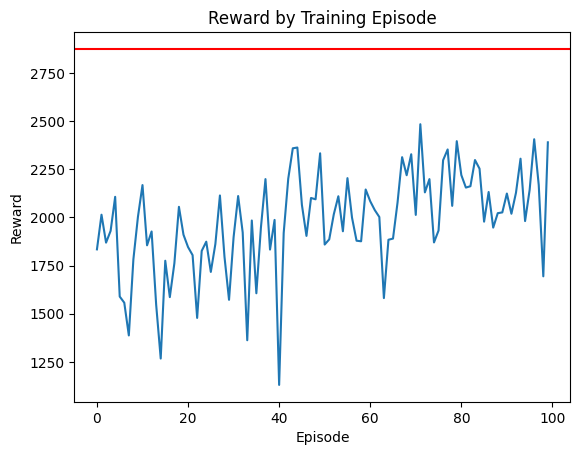

In [11]:
plt.title("Reward by Training Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(ending_ep_rewards)
plt.axhline(y=2875.1, color='r', linestyle='-')
plt.show()

In [12]:
num_test_episodes=15
test_stats = []
for episode in range(num_test_episodes):
    test_stats.append({
        "num_apples": [],
        "num_dirt": [],
        "pickers": [],
        "cleaners": [],
        "total_reward": 0,
    })
    
    print(f"========= Episode {episode} =========")

    states, info = env.reset()
    state = states["coordinator"]
    test_stats[-1]["num_apples"].append(info["apple"])
    test_stats[-1]["num_dirt"].append(info["dirt"])
    test_stats[-1]["pickers"].append(info["picker"])
    test_stats[-1]["cleaners"].append(info["cleaner"])

    #print(f"info: {info}")

    for step in tqdm(range(steps_per_epsiode)):
        num_cleaners, num_pickers = agentCoordinator.generate_roles()
        assignments = env.get_greedy_assignments(num_pickers, num_cleaners)
        actions = env.get_greedy_actions(assignments)
        next_states, reward, dones, _, info = env.step(actions)
        next_state = next_states["coordinator"]
        test_stats[-1]["num_apples"].append(info["apple"])
        test_stats[-1]["num_dirt"].append(info["dirt"])
        test_stats[-1]["pickers"].append(info["picker"])
        test_stats[-1]["cleaners"].append(info["cleaner"])

        state = next_state

        if episode > verbose_episode:
            print(f"========= Step {step} =========")
            print(f"info: {info}")

        if dones["__all__"]:
            break 

    ending_reward = info["total_apple_consumed"]

    test_stats[-1]["total_reward"] = ending_reward

    print(f"ending reward: {ending_reward}")
    #print(f"reward graph: {reward_graph}")
    print(f"========= End of Episode {episode} =========")



========= Episode 0 =========


100%|█████████▉| 999/1000 [00:03<00:00, 261.73it/s]


ending reward: 1198
========= End of Episode 0 =========
========= Episode 1 =========


100%|█████████▉| 999/1000 [00:03<00:00, 253.04it/s]


ending reward: 1070
========= End of Episode 1 =========
========= Episode 2 =========


100%|█████████▉| 999/1000 [00:03<00:00, 270.12it/s]


ending reward: 1217
========= End of Episode 2 =========
========= Episode 3 =========


100%|█████████▉| 999/1000 [00:03<00:00, 266.33it/s]


ending reward: 1222
========= End of Episode 3 =========
========= Episode 4 =========


100%|█████████▉| 999/1000 [00:03<00:00, 266.75it/s]


ending reward: 1235
========= End of Episode 4 =========
========= Episode 5 =========


100%|█████████▉| 999/1000 [00:03<00:00, 274.88it/s]


ending reward: 1224
========= End of Episode 5 =========
========= Episode 6 =========


100%|█████████▉| 999/1000 [00:03<00:00, 264.97it/s]


ending reward: 1095
========= End of Episode 6 =========
========= Episode 7 =========


100%|█████████▉| 999/1000 [00:03<00:00, 270.15it/s]


ending reward: 1127
========= End of Episode 7 =========
========= Episode 8 =========


100%|█████████▉| 999/1000 [00:03<00:00, 268.56it/s]


ending reward: 1164
========= End of Episode 8 =========
========= Episode 9 =========


100%|█████████▉| 999/1000 [00:03<00:00, 266.03it/s]


ending reward: 1039
========= End of Episode 9 =========
========= Episode 10 =========


100%|█████████▉| 999/1000 [00:03<00:00, 255.73it/s]


ending reward: 1073
========= End of Episode 10 =========
========= Episode 11 =========


100%|█████████▉| 999/1000 [00:03<00:00, 258.17it/s]


ending reward: 927
========= End of Episode 11 =========
========= Episode 12 =========


100%|█████████▉| 999/1000 [00:04<00:00, 240.65it/s]


ending reward: 1074
========= End of Episode 12 =========
========= Episode 13 =========


100%|█████████▉| 999/1000 [00:03<00:00, 258.28it/s]


ending reward: 1256
========= End of Episode 13 =========
========= Episode 14 =========


100%|█████████▉| 999/1000 [00:03<00:00, 270.12it/s]

ending reward: 1145
========= End of Episode 14 =========


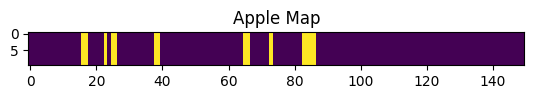

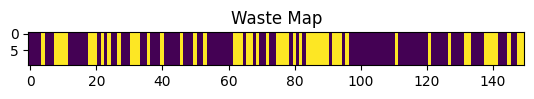

/Users/gabeguralnick/git/social_reinforcement_learning/environments/one_d_cleanup_env.py:474: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  apple_agent_map[np.where(apple_agent_map == id)] = 1


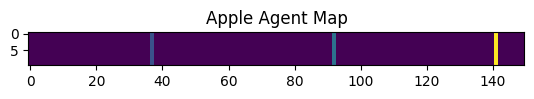

/Users/gabeguralnick/git/social_reinforcement_learning/environments/one_d_cleanup_env.py:484: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  waste_agent_map[np.where(waste_agent_map == id)] = 1


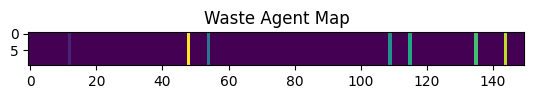

In [13]:
env.render()

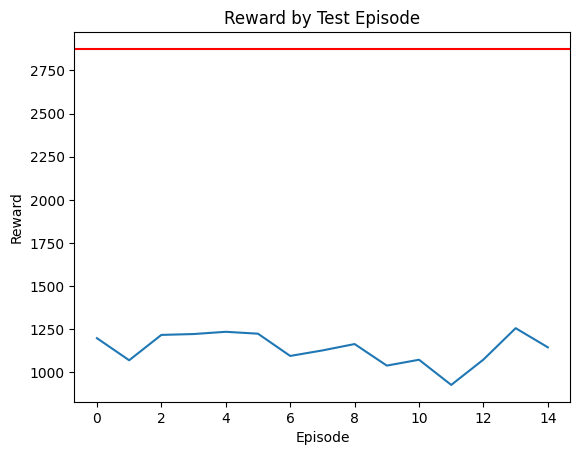

Average reward: 1137.7333333333333


In [14]:
plt.figure()
plt.title("Reward by Test Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot([stat['total_reward'] for stat in test_stats])
plt.axhline(y=2875.1, color='r', linestyle='-')
plt.show()
print(f"Average reward: {np.mean([stat['total_reward'] for stat in test_stats])}")

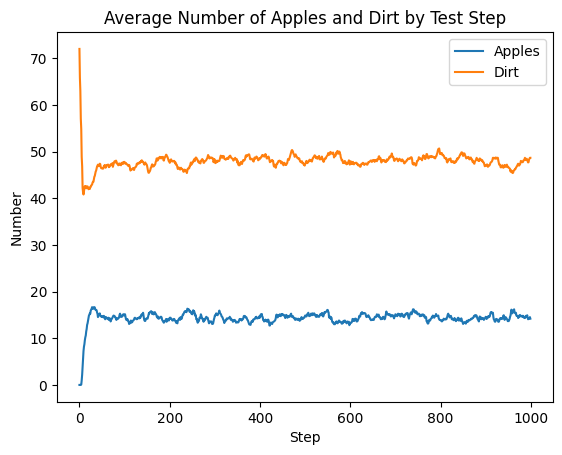

In [15]:
plt.figure()
plt.title("Average Number of Apples and Dirt by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_apples = []
avg_num_dirt = []
for i in range(steps_per_epsiode):
    avg_num_apples.append(np.mean([stat['num_apples'][i] for stat in test_stats]))
    avg_num_dirt.append(np.mean([stat['num_dirt'][i] for stat in test_stats]))
plt.plot(avg_num_apples, label="Apples")
plt.plot(avg_num_dirt, label="Dirt")
plt.legend()
plt.show()

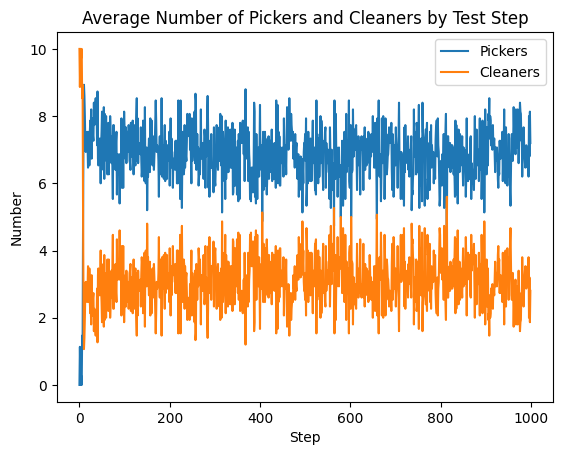

In [16]:
plt.figure()
plt.title("Average Number of Pickers and Cleaners by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_pickers = []
avg_num_cleaners = []
for i in range(steps_per_epsiode):
    avg_num_pickers.append(np.mean([stat['pickers'][i] for stat in test_stats]))
    avg_num_cleaners.append(np.mean([stat['cleaners'][i] for stat in test_stats]))
plt.plot(avg_num_pickers, label="Pickers")
plt.plot(avg_num_cleaners, label="Cleaners")
plt.legend()
plt.show()

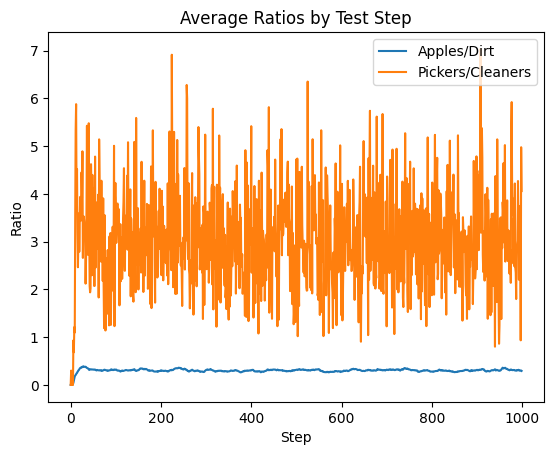

In [17]:
plt.figure()
plt.title("Average Ratios by Test Step")
plt.xlabel("Step")
plt.ylabel("Ratio")
avg_apple_dirt_ratios = []
apple_dirt_steps = []
avg_picker_cleaner_ratios = []
picker_cleaner_steps = []
for i in range(steps_per_epsiode):
    #avg_apple_dirt_ratios.append(np.mean([stat['num_apples'][i] / (stat['num_dirt'][i] + 1e-8) for stat in test_stats]))
    #avg_picker_cleaner_ratios.append(np.mean([stat['pickers'][i] / (stat['cleaners'][i]) for stat in test_stats if stat['cleaners'][i] > 0]))
    apple_dirt = []
    picker_cleaner = []
    for stat in test_stats:
        if stat['num_dirt'][i] > 0:
            apple_dirt.append(stat['num_apples'][i] / stat['num_dirt'][i])
        if stat['cleaners'][i] > 0:
            picker_cleaner.append(stat['pickers'][i] / stat['cleaners'][i])
    if len(apple_dirt) > 0:
        avg_apple_dirt_ratios.append(np.mean(apple_dirt))
        apple_dirt_steps.append(i)
    if len(picker_cleaner) > 0:
        avg_picker_cleaner_ratios.append(np.mean(picker_cleaner))
        picker_cleaner_steps.append(i)

plt.plot(apple_dirt_steps, avg_apple_dirt_ratios, label="Apples/Dirt")
plt.plot(picker_cleaner_steps, avg_picker_cleaner_ratios, label="Pickers/Cleaners")
plt.legend()
plt.show()

average picker cleaner ratio 2.8576842363762194
average apple dirt ratio 0.30701398262392526


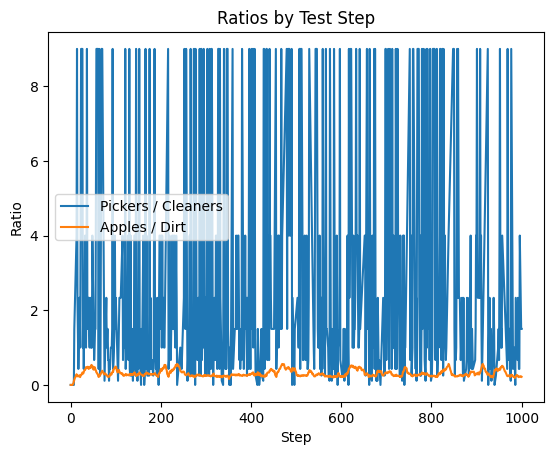

In [18]:
plt.figure()
plt.title("Ratios by Test Step")
plt.xlabel("Step")
plt.ylabel("Ratio")
episode = test_stats[0]
#plt.plot([episode['pickers'][i] / (episode['cleaners'][i] + 1e-1) for i in range(len(episode['pickers']))])

picker_cleaner_ratios = []
picker_cleaner_steps = []
for i, (num_pickers, num_cleaners) in enumerate(zip(episode['pickers'], episode['cleaners'])):
    if num_cleaners > 0:
        picker_cleaner_ratios.append(num_pickers / num_cleaners)
        picker_cleaner_steps.append(i)
print('average picker cleaner ratio', np.mean(picker_cleaner_ratios))
plt.plot(picker_cleaner_steps, picker_cleaner_ratios, label='Pickers / Cleaners')

apple_dirt_ratios = []
apple_dirt_steps = []
for i, (num_apples, num_dirt) in enumerate(zip(episode['num_apples'], episode['num_dirt'])):
    if num_dirt > 0:
        apple_dirt_ratios.append(num_apples / num_dirt)
        apple_dirt_steps.append(i)
plt.plot(apple_dirt_steps, apple_dirt_ratios, label='Apples / Dirt')
print('average apple dirt ratio', np.mean(apple_dirt_ratios))
plt.legend()
plt.show()

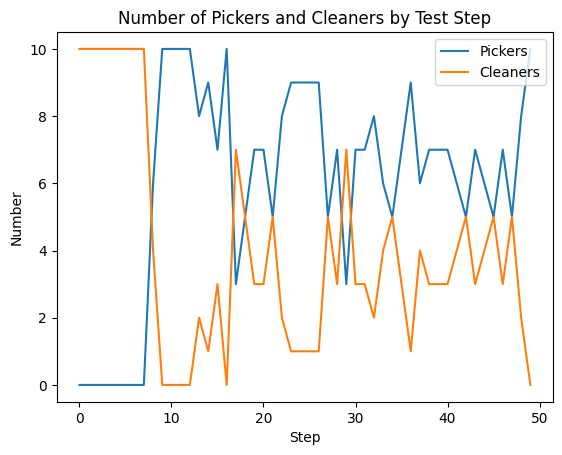

In [19]:
plt.figure()
plt.title("Number of Pickers and Cleaners by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
episode = test_stats[0]
plt.plot(episode['pickers'][:50], label="Pickers")
plt.plot(episode['cleaners'][:50], label="Cleaners")
plt.legend()
plt.show()